<a href="https://colab.research.google.com/github/AbdoIbrahim/food-sales-predictions/blob/main/Project_1_Final_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#import Libraries 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [5]:
filename = '/content/sales_predictions (1).csv'
df = pd.read_csv('/content/sales_predictions (1).csv')
df


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
#make an unaltered copy of the dataframe for the Machine Learning Model preprocessing  it will be titled ml_df
ml_df = df.copy()

In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


(8523, 12)

***Question 1***:
1) How many rows and columns?

8523 rows × 12 columns

**Question 2:** 
2) What are the datatypes of each variable?

0   Item_Identifier            8523 non-null   object 

 1   Item_Weight                7060 non-null   float64


 2   Item_Fat_Content           8523 non-null   object

 3   Item_Visibility            8523 non-null   float64

 4   Item_Type                  8523 non-null   object

 5   Item_MRP                   8523 non-null   float64

 6   Outlet_Identifier          8523 non-null   object

 7   Outlet_Establishment_Year  8523 non-null   int64

 8   Outlet_Size                6113 non-null   object

 9   Outlet_Location_Type       8523 non-null   object 

 10  Outlet_Type                8523 non-null   object 
 
 11  Item_Outlet_Sales          8523 non-null   float64

**Question 3**) Are there duplicates? If so, drop any duplicates.



In [56]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [57]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [58]:
df.duplicated().sum()

0

In [59]:
df = df.drop_duplicates()
df.duplicated().sum()

0

**Question 4)** Identify missing values.



In [60]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [61]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [62]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [63]:
#df['Outlet_Size'] = df['Outlet_Size'].fillna(0)

In [64]:
df['Outlet_Size'] = df['Outlet_Size'].fillna('Medium')

In [65]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


**Question 8**) For any numerical columns, obtain the summary statistics of each (min, max, mean)



In [66]:
df['Item_Weight'].mean() 

12.857645184135976

In [67]:
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [68]:
df['Item_Weight'].min()

4.555

In [69]:
df['Item_Weight'].max()

21.35

In [70]:
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [71]:
#Address inconsistncies in values first I'll convert the Item Weight column to a float datatype. 
df['Item_Weight'] = df['Item_Weight'].astype(float)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [72]:
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [73]:
#Code to check for  missing values in the Item Weight Column 
df['Item_Weight'].isna().sum()

1463

In [75]:

common_weight = df['Item_Weight'].mean()#created variable common_weight with mean of values In the Column Item_weight
df['Item_Weight'].fillna(common_weight, inplace=True) # This command fills any na value with the mean of Item_Weeight 

In [76]:
# Check if any missing values in Column Item Weight are left 
df['Item_Weight'].isna().sum()

0

In [77]:
df['Outlet_Size'].isna().sum()

0

In [78]:
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [79]:
df['Item_Fat_Content'].value_counts() #Code lets me know what are the Value counts in the Item Fat Content Column 

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

I need to replace the other values(LF ,reg and low fat) with Low Fat and Regular 

In [80]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF'],'Low Fat') 
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['low fat'],'Low Fat') 
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['reg'],'Regular') 


In [81]:
df['Item_Fat_Content'].value_counts() #Check if values were replaced correctly 


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [82]:
df['Item_Visibility'].mean()

0.06613202877895108

In [83]:
df['Item_Visibility'].min()

0.0

In [84]:
df['Item_Visibility'].max()

0.328390948

In [85]:
df['Item_Outlet_Sales'].mean()

2181.288913575032

In [86]:
df['Item_Outlet_Sales'].max()

13086.9648

In [87]:
df['Item_Outlet_Sales'].min()

33.29

In [88]:
df['Item_Visibility'].mean()

0.06613202877895108

In [89]:
df['Item_Visibility'].min()

0.0

In [90]:
df['Item_Visibility'].max()

0.328390948

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [92]:
df[['Item_MRP','Outlet_Location_Type']].corr()

,Item_MRP
Item_MRP,1.0


In [93]:
df[['Item_Outlet_Sales','Item_MRP']].corr()

,Item_Outlet_Sales,Item_MRP
Item_Outlet_Sales,1.000000,0.567574
Item_MRP,0.567574,1.000000


In [94]:
df[['Item_MRP','Item_Weight']].corr()

,Item_MRP,Item_Weight
Item_MRP,1.000000,0.024756
Item_Weight,0.024756,1.000000


In [95]:
df[['Item_MRP','Item_Visibility']].corr()

,Item_MRP,Item_Visibility
Item_MRP,1.000000,-0.001315
Item_Visibility,-0.001315,1.000000


In [96]:
df[['Outlet_Establishment_Year','Item_Outlet_Sales']].corr()

,Outlet_Establishment_Year,Item_Outlet_Sales
Outlet_Establishment_Year,1.000000,-0.049135
Item_Outlet_Sales,-0.049135,1.000000


In [97]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


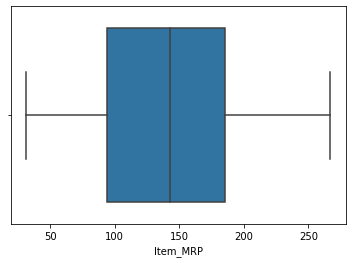

In [98]:
sns.boxplot(df['Item_MRP'], orient='v')
plt.show()

Text(0, 0.5, 'Sales')

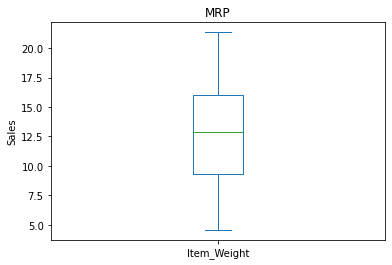

In [99]:
df['Item_Weight'].plot(kind='box')
plt.title('MRP')
plt.ylabel('Sales')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


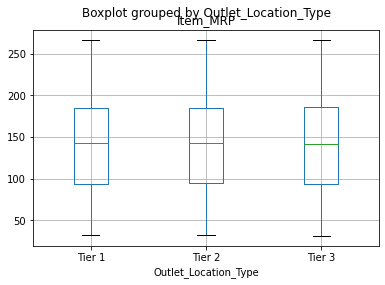

In [100]:
#Comparsion of a Item MRP and the type of location the item is sold at

df.boxplot(column='Item_MRP', by ='Outlet_Location_Type');

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


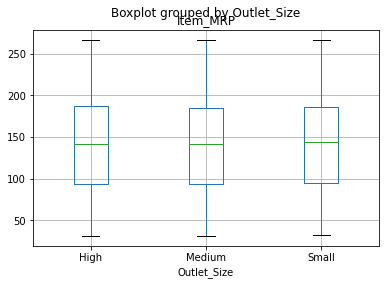

In [101]:
#Comparsion of an outlet's size and Item MRP
df.boxplot(column='Item_MRP', by ='Outlet_Size');

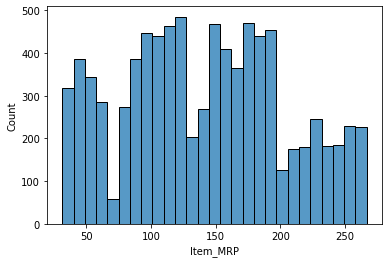

In [102]:
#Histogram of 
sns.histplot(df['Item_MRP'])

(array([ 923.,  573., 1053., 1248.,  804., 1098., 1200.,  480.,  557.,
         587.]),
 array([ 31.29   ,  54.84984,  78.40968, 101.96952, 125.52936, 149.0892 ,
        172.64904, 196.20888, 219.76872, 243.32856, 266.8884 ]),
 <a list of 10 Patch objects>)

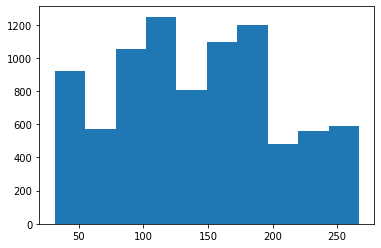

In [103]:
plt.hist(df['Item_MRP'])

In [104]:
item_mrp = df['Item_MRP']
item_viz = df['Item_Visibility']
outlet = df['Outlet_Size']

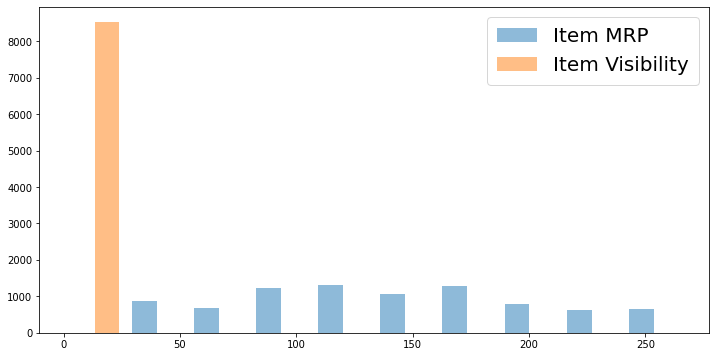

In [105]:
plt.figure(figsize=(12, 6))
plt.hist([item_mrp,item_viz], label=['Item MRP','Item Visibility'], bins = 10, alpha = 0.5)
plt.legend(borderpad=0.5, fontsize=20)
plt.show()

In [106]:
item_mrp = df['Item_MRP']
item_sales = df['Item_Outlet_Sales']

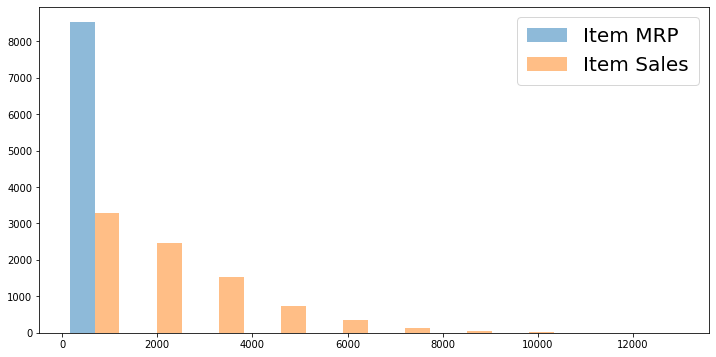

In [107]:
plt.figure(figsize=(12, 6))
plt.hist([item_mrp,item_sales], label=['Item MRP','Item Sales'], bins = 10, alpha = 0.5)
plt.legend(borderpad=0.5, fontsize=20)
plt.show()

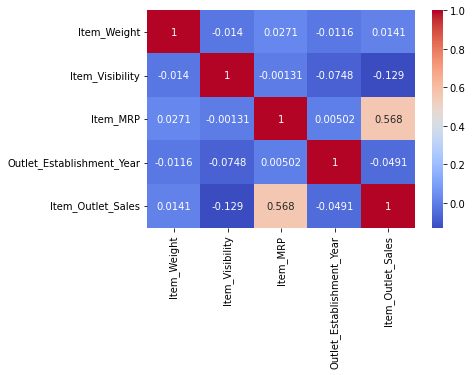

In [5]:
sns.heatmap(df.corr(), annot = True, fmt='.3g', cmap='coolwarm')

#Start of Project 1 Week 4 

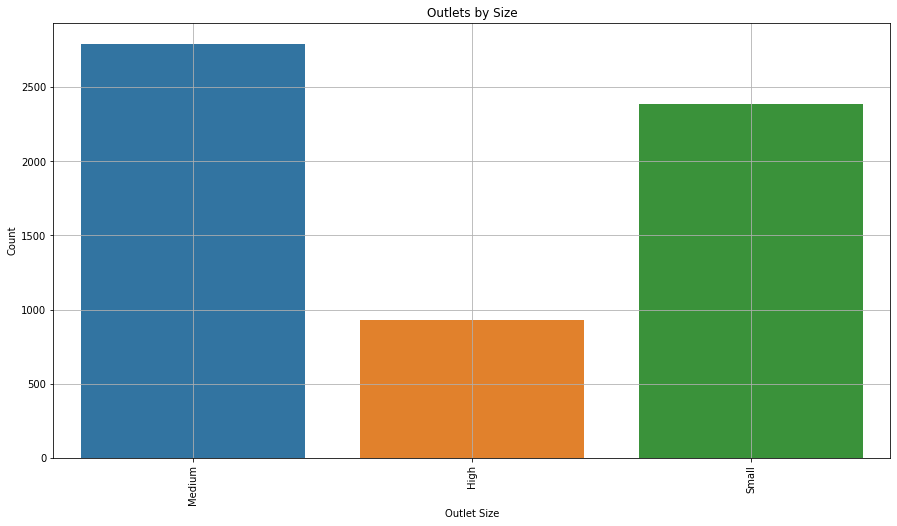

In [6]:
plt.figure(figsize=(15,8))
plt.title("Outlets by Size")
sns.countplot(data=df,x='Outlet_Size')
plt.xticks(rotation=90)
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.grid()

NameError: ignored

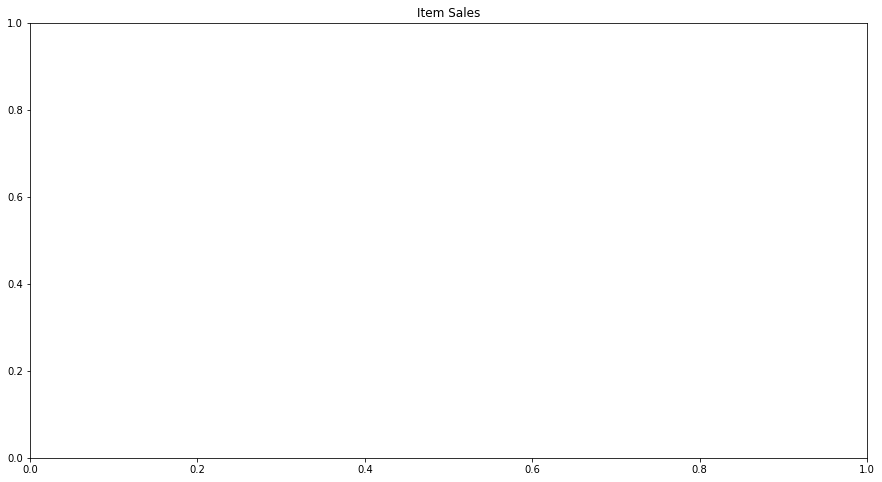

In [7]:
plt.figure(figsize=(15,8))
plt.title("Item Sales")
plt.plot(item_mrp, c = 'green', marker = '.', markersize = 10)
plt.xticks(rotation=180)
plt.xlabel('Items')
plt.ylabel('Items Sold')
plt.grid()


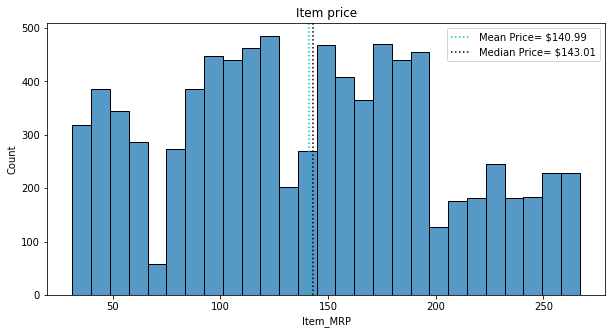

In [8]:


## Make a larger fig/ax before plotting
fig, ax = plt.subplots(figsize=(10,5))

## Plot histogram
sns.histplot(data=df, x='Item_MRP', ax=ax)
ax.set(title='Item price');

## Annotating mean and median
mean_price = df['Item_MRP'].mean()
ax.axvline(mean_price,color='c', ls=':', 
           label=f"Mean Price= ${round(mean_price,2)}");

med_price = df['Item_MRP'].median()
ax.axvline(med_price,color='k', ls=':', 
           label=f"Median Price= ${round(med_price,2)}");

ax.legend();

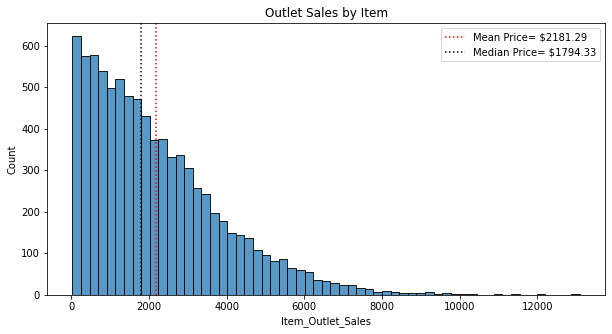

In [9]:
## Make a larger fig/ax before plotting
fig, ax = plt.subplots(figsize=(10,5))

## Plot histogram
sns.histplot(data=df, x='Item_Outlet_Sales', ax=ax)
ax.set(title='Outlet Sales by Item');

## Annotating mean and median
mean_price = df['Item_Outlet_Sales'].mean()
ax.axvline(mean_price,color='r', ls=':', 
           label=f"Mean Price= ${round(mean_price,2)}");

med_price = df['Item_Outlet_Sales'].median()
ax.axvline(med_price,color='k', ls=':', 
           label=f"Median Price= ${round(med_price,2)}");

ax.legend();

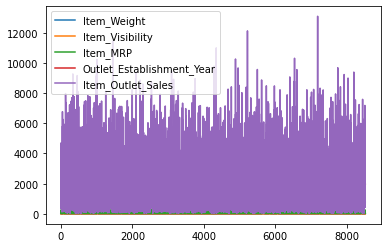

In [113]:
df.plot()

# Start of Project 1 Week 5 

In [28]:
#import Libraries 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import set_config
set_config(display='diagram')

In [8]:
# Restarted runtime to elminate changes made to the dataframe
# make a copy of the datafram ml_df will be the copy I use for machine learning pre proceessing and modeling 
ml_df = df.copy()

In [63]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
#Check for Missing Data 
ml_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
ml_df.duplicated().sum()

0

In [11]:
#Test Train split 

X = ml_df.drop('Item_Outlet_Sales', axis=1)#Independent Variables 
y = ml_df['Item_Outlet_Sales']#Target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)#Test Train Split 

In [12]:
#Make column selectors 
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [13]:
#Make Imputers 
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Make a Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [14]:
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [15]:
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [16]:
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9862a38a10>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9862a38790>)])

In [17]:
preprocessor.fit(X_train)


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9862a38a10>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9862a38790>)])

In [18]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [19]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 1595)




array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

#Start of Final Part of the project Week 6 

In [20]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
scaler = StandardScaler()

In [21]:
from sklearn.pipeline import make_pipeline
reg_pipe = make_pipeline(scaler, reg)

In [22]:
reg_pipe = make_pipeline(preprocessor, reg)

In [34]:
reg_pipe.fit(X_train,y_train)



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9862a38a10>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9862a38790>)])),
                ('linearregression', LinearRegression())])

In [24]:
predictions = reg_pipe.predict(X_test)

In [25]:
prediction_df = X_test.copy()
prediction_df['Item_Outlet_Sales'] = y_test
prediction_df['Predicted Item_Outlet_Sales'] = predictions
prediction_df['Error'] = predictions - y_test
prediction_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Predicted Item_Outlet_Sales,Error
7503,FDI28,14.300,Low Fat,0.026300,Frozen Foods,79.4302,OUT013,1987,High,Tier 3,Supermarket Type1,1743.0644,852.0,-891.0644
2957,NCM17,7.930,Low Fat,0.071136,Health and Hygiene,42.7086,OUT046,1997,Small,Tier 1,Supermarket Type1,356.8688,1392.0,1035.1312
7031,FDC14,14.500,Regular,0.041313,Canned,42.0454,OUT049,1999,Medium,Tier 1,Supermarket Type1,377.5086,1436.0,1058.4914
1084,DRC36,NaN,Regular,0.044767,Soft Drinks,173.7054,OUT027,1985,Medium,Tier 3,Supermarket Type3,5778.4782,3924.0,-1854.4782
856,FDS27,10.195,Regular,0.012456,Meat,197.5110,OUT035,2004,Small,Tier 2,Supermarket Type1,2356.9320,2056.0,-300.9320


In [46]:
#make prediction variables to calculate regression metrics 
train_pred = reg_pipe.predict(X_train)
test_pred = reg_pipe.predict(X_test)

In [29]:
#make variables for r^2 score 
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

In [30]:
#print the differences between the Training and Testing Models in order to evaluate the difference in r^2 scores 
print(f'Model Training R2:{train_r2}')
print(f'Model Testing R2:{test_r2}')

Model Training R2:0.6315530896792858
Model Testing R2:-8.656163822130806e+20


In [31]:
# I need to calculate RMSE Root Mean Squared Error so I will calculate the MSE Mean Standard Error then the RMSE 
train_MSE = mean_squared_error(y_train, train_pred)
test_MSE = mean_squared_error(y_test, test_pred)
print(f'Model Training MSE:{train_MSE}')
print(f'Model Testing MSE:{test_MSE}')

Model Training MSE:1090402.310563823
Model Testing MSE:2.3882159384792534e+27


In [32]:
#calculate RMSE 
train_RMSE = np.sqrt(train_MSE)
test_RMSE = np.sqrt(test_MSE)

print(f'Model Training RMSE:{train_RMSE}')
print(f'Model Testing RMSE:{test_RMSE}')

Model Training RMSE:1044.223304932342
Model Testing RMSE:48869376284942.016


In [36]:
#Make a Decision tree 
#import 
from sklearn.tree import DecisionTreeRegressor


In [37]:
dec_tree = DecisionTreeRegressor(random_state=42)

In [40]:
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [43]:
train_preds = dec_tree.predict(X_train_processed)
test_preds = dec_tree.predict(X_test_processed)

In [44]:
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

1.0
0.22560314645107293


In [48]:
#Get Tree Parameters 
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [49]:
#Get Tree Depth 
dec_tree.get_depth()

81

In [51]:
dec_tree.get_n_leaves()

6264

In [54]:
dec_tree_2 = DecisionTreeRegressor(max_depth = 2, random_state = 42)
dec_tree_2.fit(X_train_processed, y_train)
train_2_score = dec_tree_2.score(X_train_processed, y_train)
test_2_score = dec_tree_2.score(X_test_processed, y_test)
print(train_2_score)
print(test_2_score)

0.43164096170474664
0.4337775044707165


In [62]:
dec_tree_15 = DecisionTreeRegressor(max_depth = 4, random_state = 42)
dec_tree_15.fit(X_train_processed, y_train)
train_15_score = dec_tree_15.score(X_train_processed, y_train)
test_15_score = dec_tree_15.score(X_test_processed, y_test)
print(train_15_score)
print(test_15_score)

0.5827053939473481
0.5839367270114887


In [63]:
# List of values to try for max_depth:
depths = list(range(2, 81)) # will try every value between 2 and 81
# Data frame to store the score for each value of max_depth:
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree.fit(X_train_processed, y_train)
    train_score = dec_tree.score(X_train_processed, y_train)
    test_score = dec_tree.score(X_test_processed, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score

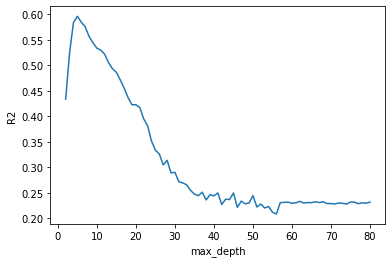

In [64]:
# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');

In [65]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
5,0.596056,0.604207
6,0.584668,0.615702
4,0.583937,0.582705
7,0.575686,0.62931
8,0.556513,0.641664


In [70]:
# Let's run the model with our optimized value for max_depth
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_5.fit(X_train_processed, y_train)
train_5_score = dec_tree_5.score(X_train_processed, y_train)
test_5_score = dec_tree_5.score(X_test_processed, y_test)
print(train_5_score)
print(test_5_score)

0.6042066848171654
0.5960564372160062


3) You now have tried 2 different models on your data set. You need to determine which model to implement.

I will Implement the seciond model since it seems more accurate than th first model that I used. The first model had wide gaps between the Train and the Test models. For example the R2 values were quite divergent between the Test and Train models. For the Training model the R2 value was 0.63 and the Testing model's Testing R2 was -8.65. This large variance in the values indicates that the model should no be used for my analysis of thefood sales data. 

Model Training R2:0.6315530896792858
Model Testing R2:-8.656163822130806e+20

